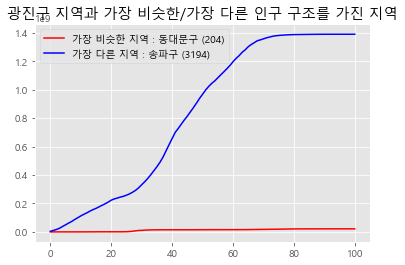

In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('seoul_population.csv', encoding='cp949', header=0, index_col=0)
# 총인구수와 연령구간인구수 column 지움
df=df.iloc[:,2:]
# Transpose
df=df.T
for col in df:
    # 광진구 column 찾기
    if '광진구' in col:   
        src_col=col
        src=df[col]
        break
# 서울특별시, 서울특별시 광진구 column 제거
df=df.drop(columns=[df.columns[0], src_col])
# 총 구 갯수
N=len(df.columns)
# 표준편차 계산 결과
result=[]
for col in df:
    dev=0
    for row in range(N):
        dev+=(int(df[col][row].replace(',',''))-int(src[row].replace(',','')))**2
    # 표준편차, 소숫점 이하 버림
    dev=int(np.sqrt(dev/N))
    # 튜플 형태로 저장
    result.append((dev,col))
# 디폴트 오름차순 정렬
result.sort()
# 가장 비슷한 곳의 열정보와 가장 다른 곳의 열정보 얻어옴
similar=df[result[0][1]]
differ=df[result[len(result)-1][1]]
# 그래프 출력 위한 값 계산
sim=[]
dif=[]
for i in range(len(src.values)):
    sim.append((int(src[i].replace(',',''))-int(similar[i].replace(',','')))**2)
    dif.append((int(src[i].replace(',',''))-int(differ[i].replace(',','')))**2)
    if i==0:
        continue
    sim[i]+=sim[i-1]
    dif[i]+=dif[i-1]
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.title('광진구 지역과 가장 비슷한/가장 다른 인구 구조를 가진 지역')
plt.style.use('ggplot')
plt.plot(sim, color='r',label='가장 비슷한 지역 : '+result[0][1].split(' ')[1]+' ('+str(result[0][0])+')')
plt.plot(dif, color='b', label='가장 다른 지역 : '+result[len(result)-1][1].split(' ')[1]+' ('+str(result[len(result)-1][0])+')')
plt.legend()
plt.show()
    